<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Pic_seen_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lobster has tasked me to assess the popularity of four photographs ("Madonna," "Prince," "Bruce," and "BonJovi") by comparing their click-through rates (CTRs) in emails sent to prospective conference attendees.
The aim of this analysis is;
Identifying which of the four photographs had statistically significant click throughs, and hence able to be utilized in the next emails.
Hypothesis:
H0: The observed click-through rates for each photograph are equal, indicating no preference among attendees.
H1: At least one photograph has a significantly different click-through rate compared to the others, suggesting a preference among attendees.


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = data = pd.read_csv("/content/music_pics_set.csv")
df.head()

,recipientID,pic_seen,click_through,site_spend,list_join,social_shares,email_fwd,unsub
0,4,Madonna,0,19.93,0,2,1,0
1,8,Madonna,0,9.21,0,1,0,0
2,10,Madonna,0,15.88,0,1,2,0
3,16,Madonna,0,15.69,0,1,3,0
4,18,Madonna,0,8.84,0,0,0,0


#Data Exploration


Summary statistics:
       recipientID  click_through   site_spend    list_join  social_shares  \
count  1512.000000    1512.000000  1512.000000  1512.000000    1512.000000   
mean    756.500000       0.063492    14.719993     0.046958       1.089286   
std     436.621117       0.243927     9.969313     0.211618       1.092949   
min       1.000000       0.000000     0.000000     0.000000       0.000000   
25%     378.750000       0.000000     9.072500     0.000000       0.000000   
50%     756.500000       0.000000    15.510000     0.000000       1.000000   
75%    1134.250000       0.000000    21.832500     0.000000       2.000000   
max    1512.000000       1.000000    44.310000     1.000000       7.000000   

         email_fwd        unsub  
count  1512.000000  1512.000000  
mean      1.056878     0.027116  
std       0.994727     0.162476  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       2.000000     0.000000  
max 

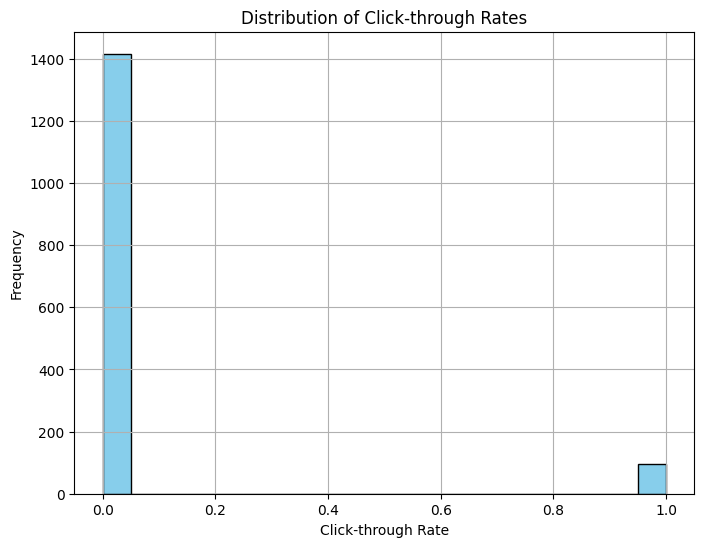


Distribution of 'pic_seen' variable:
pic_seen
Madonna    449
Prince     375
Bruce      347
BonJovi    341
Name: count, dtype: int64

Distribution of 'site_spend' variable:
site_spend
0.00     340
20.99      4
21.37      4
15.64      4
16.83      4
        ... 
18.27      1
15.11      1
13.35      1
25.03      1
10.43      1
Name: count, Length: 924, dtype: int64

Missing values:
recipientID      0
pic_seen         0
click_through    0
site_spend       0
list_join        0
social_shares    0
email_fwd        0
unsub            0
dtype: int64


In [117]:
# Summary statistics of numerical variables
print("\nSummary statistics:")
print(df.describe())

# Check the distribution of click-through rates
print("\nDistribution of click-through rates:")
print(df['click_through'].value_counts())

# Visualize the distribution of click-through rates


plt.figure(figsize=(8, 6))
plt.hist(df['click_through'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Click-through Rates')
plt.xlabel('Click-through Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check the distribution of other variables
print("\nDistribution of 'pic_seen' variable:")
print(df['pic_seen'].value_counts())

print("\nDistribution of 'site_spend' variable:")
print(df['site_spend'].value_counts())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


array([[<Axes: title={'center': 'recipientID'}>,
        <Axes: title={'center': 'click_through'}>,
        <Axes: title={'center': 'site_spend'}>],
       [<Axes: title={'center': 'list_join'}>,
        <Axes: title={'center': 'social_shares'}>,
        <Axes: title={'center': 'email_fwd'}>],
       [<Axes: title={'center': 'unsub'}>, <Axes: >, <Axes: >]],
      dtype=object)

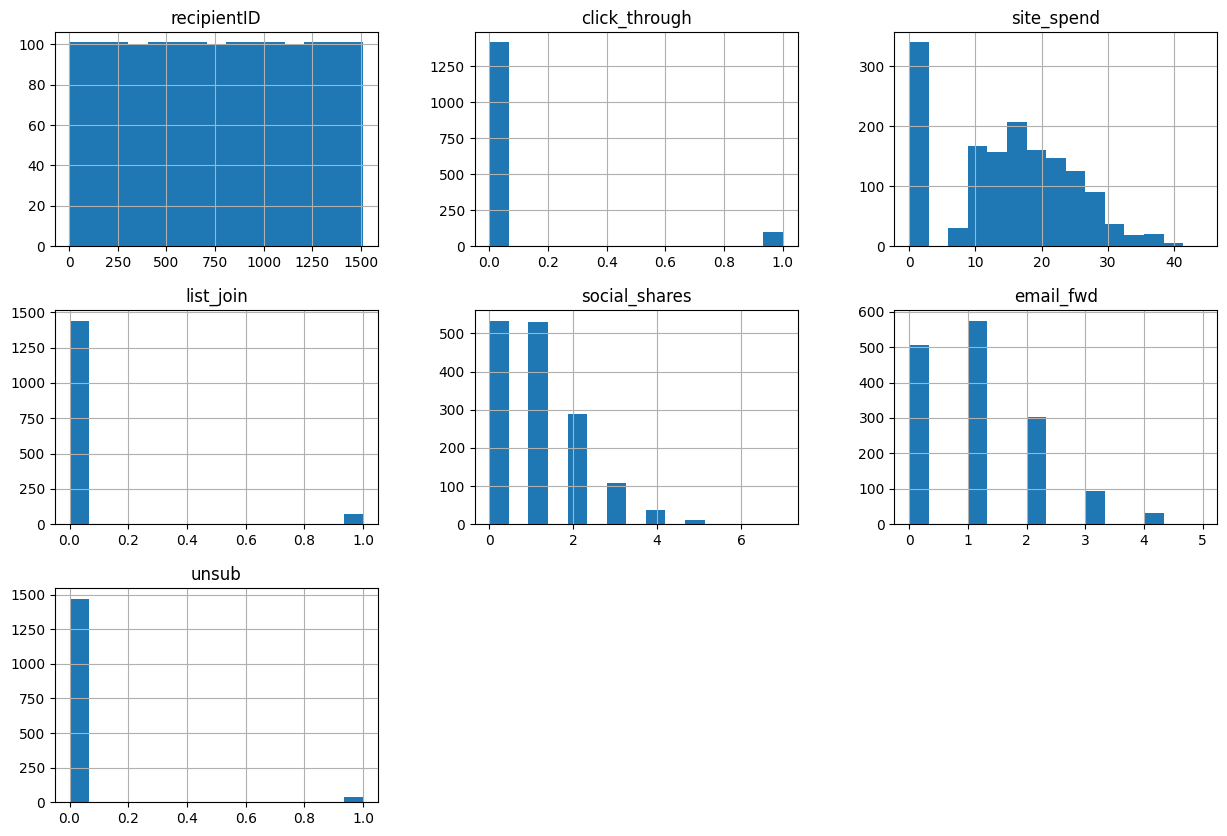

In [118]:
df.hist(bins = 15, figsize = (15, 10))

In [119]:
df.head()

,recipientID,pic_seen,click_through,site_spend,list_join,social_shares,email_fwd,unsub
0,4,Madonna,0,19.93,0,2,1,0
1,8,Madonna,0,9.21,0,1,0,0
2,10,Madonna,0,15.88,0,1,2,0
3,16,Madonna,0,15.69,0,1,3,0
4,18,Madonna,0,8.84,0,0,0,0


In [120]:
#Let us check for missing values
df.isnull().sum()

recipientID      0
pic_seen         0
click_through    0
site_spend       0
list_join        0
social_shares    0
email_fwd        0
unsub            0
dtype: int64

In [121]:
df.nunique()

recipientID      1512
pic_seen            4
click_through       2
site_spend        924
list_join           2
social_shares       8
email_fwd           6
unsub               2
dtype: int64

#No missing values Found, We proceed to statistical analysis

#Statistical Analyis Part

1. Of the given columns, clickthrough might be effective in predicting which image is statistically significance in influencing preference. We will start with it.

In [122]:
#  Calculate Observed Click-through Rates
observed = df.groupby('pic_seen')['click_through'].sum()

# Calculate Expected Values
expected = df['click_through'].sum() / len(df['pic_seen'].unique())

# Construct Contingency Table
contingency_table = pd.concat([observed, pd.Series([expected]*len(observed), index=observed.index)], axis=1)

#  Perform Chi-Square Goodness of Fit Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print Overall Statistical Results
print("Overall Statistical Results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print()

#Print Click-through Values with Corresponding P-values and F-statistics
print("Click-through Values for Each Picture:")
for pic, obs in observed.items():
    expected_obs = expected * len(df[df['pic_seen'] == pic])
    chi2_stat, p_val, _, _ = chi2_contingency([[obs, expected_obs]])
    print(f"{pic}:")
    print(f"  Click-throughs: {obs}")
    print(f"  p-value: {p_val}")
    print(f"  F-statistic: {chi2_stat}")
    print()

Overall Statistical Results:
Chi-squared statistic: 0.37079179497886106
P-value: 0.946207882303452

Click-through Values for Each Picture:
BonJovi:
  Click-throughs: 22
  p-value: 1.0
  F-statistic: 0.0

Bruce:
  Click-throughs: 25
  p-value: 1.0
  F-statistic: 0.0

Madonna:
  Click-throughs: 27
  p-value: 1.0
  F-statistic: 0.0

Prince:
  Click-throughs: 22
  p-value: 1.0
  F-statistic: 0.0



#Now, after conducting a Chi Square analysis based on the click throughs only, the results indicate that all the p-values are equal to 1.0. What this means is that that there is no statistically significant difference in click-through rates only among the pictures, which could enable us to reach at a conclusion. F-statistic values being 0.0 further support this interpretation. The reason for this is that the click thoughts vaues are too similar among the different pictures, resulting in the Chi-Square test not detecting any significant differences.  

In [123]:
#We can also do the Post-hoc analysis
from statsmodels.stats.multitest import multipletests

# Perform pairwise chi-squared tests with Bonferroni correction
pairwise_tests = []
for i in range(len(contingency_table.columns)):
    for j in range(i + 1, len(contingency_table.columns)):
        test_results = chi2_contingency(contingency_table.iloc[:, [i, j]])
        pairwise_tests.append(test_results)

# Adjust p-values for multiple comparisons using Bonferroni correction
p_adjusted = multipletests([test[1] for test in pairwise_tests], method='bonferroni')

# Print adjusted p-values for each pairwise comparison
print("Adjusted p-values for pairwise comparisons:", p_adjusted[1])

Adjusted p-values for pairwise comparisons: [0.94620788]


#Further analyses

In [124]:
#We can also come up with a correlation matrix
# Calculate correlation matrix
correlation_matrix = df[['site_spend', 'list_join', 'social_shares', 'email_fwd', 'click_through']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Identify variables significantly correlated with click_through
significant_correlation = correlation_matrix['click_through'][abs(correlation_matrix['click_through']) > 0.1].index.tolist()

print("Variables significantly correlated with click_through:", significant_correlation)

Correlation Matrix:
               site_spend  list_join  social_shares  email_fwd  click_through
site_spend       1.000000  -0.032132       0.052373   0.045058      -0.000329
list_join       -0.032132   1.000000       0.036228   0.012455      -0.006512
social_shares    0.052373   0.036228       1.000000   0.036720       0.023406
email_fwd        0.045058   0.012455       0.036720   1.000000       0.026020
click_through   -0.000329  -0.006512       0.023406   0.026020       1.000000
Variables significantly correlated with click_through: ['click_through']


#Chi Square Test, T-test and Goodness of Fit

In [125]:
import scipy.stats as stats
#For individual features
#  Perform T-tests for each category
t_test_results = {}
for category in y_dummy.columns:
    for feature in X.columns:
        t_statistic, p_value = stats.ttest_ind(X.loc[y_dummy[category] == 1, feature], X.loc[y_dummy[category] == 0, feature])
        t_test_results[(category, feature)] = (t_statistic, p_value)

# Print T-test results
for (category, feature), (t_statistic, p_value) in t_test_results.items():
    print(f"T-test Results for '{category}' Category and Feature '{feature}':")
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")
    print()

# Perform Chi-square tests for each category
chi2_test_results = {}
for category in y_dummy.columns:
    for feature in X.columns:
        contingency_table = pd.crosstab(X[feature], y_dummy[category])
        chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
        chi2_test_results[(category, feature)] = (chi2_statistic, p_value)

# Print Chi-square test results
for (category, feature), (chi2_statistic, p_value) in chi2_test_results.items():
    print(f"Chi-square Test Results for '{category}' Category and Feature '{feature}':")
    print(f"Chi-square statistic: {chi2_statistic}, p-value: {p_value}")
    print()


T-test Results for 'BonJovi' Category and Feature 'const':
T-statistic: nan, p-value: nan

T-test Results for 'BonJovi' Category and Feature 'site_spend':
T-statistic: 0.11250024428322815, p-value: 0.9104417292611422

T-test Results for 'BonJovi' Category and Feature 'list_join':
T-statistic: 1.4507850837953633, p-value: 0.14704740948569361

T-test Results for 'BonJovi' Category and Feature 'social_shares':
T-statistic: 8.7431190698782, p-value: 5.925480330107421e-18

T-test Results for 'BonJovi' Category and Feature 'email_fwd':
T-statistic: 5.15301556237757, p-value: 2.901633427227923e-07

T-test Results for 'Bruce' Category and Feature 'const':
T-statistic: nan, p-value: nan

T-test Results for 'Bruce' Category and Feature 'site_spend':
T-statistic: 2.2254679198862086, p-value: 0.026197040986684027

T-test Results for 'Bruce' Category and Feature 'list_join':
T-statistic: 0.20387783147572755, p-value: 0.8384764415686021

T-test Results for 'Bruce' Category and Feature 'social_shares

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Chi-square Test Results for 'BonJovi' Category and Feature 'const':
Chi-square statistic: 0.0, p-value: 1.0

Chi-square Test Results for 'BonJovi' Category and Feature 'site_spend':
Chi-square statistic: 916.9866900441895, p-value: 0.5496342716472421

Chi-square Test Results for 'BonJovi' Category and Feature 'list_join':
Chi-square statistic: 1.7037971661207894, p-value: 0.1917921383746351

Chi-square Test Results for 'BonJovi' Category and Feature 'social_shares':
Chi-square statistic: 84.85382152286134, p-value: 1.4043738834515937e-15

Chi-square Test Results for 'BonJovi' Category and Feature 'email_fwd':
Chi-square statistic: 33.54856555512338, p-value: 2.928059057665134e-06

Chi-square Test Results for 'Bruce' Category and Feature 'const':
Chi-square statistic: 0.0, p-value: 1.0

Chi-square Test Results for 'Bruce' Category and Feature 'site_spend':
Chi-square statistic: 912.7979995154485, p-value: 0.5881534232075467

Chi-square Test Results for 'Bruce' Category and Feature 'list

In [126]:
import pandas as pd
from scipy.stats import chi2_contingency

# Calculate Observed Click-through Rates
observed = df.groupby('pic_seen')['click_through'].sum()

# Calculate Expected Values
expected = df['click_through'].sum() / len(df['pic_seen'].unique())

#Construct Contingency Table
contingency_table = pd.concat([observed, pd.Series([expected]*len(observed), index=observed.index)], axis=1)

#Perform Chi-Square Goodness of Fit Test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 0.37079179497886106
P-value: 0.946207882303452


In [127]:
#Very most importantly, a one way anova will help us come up with which single pic is actually recomendable
from scipy.stats import f_oneway

# Extract click-through rates for each photograph
madonna = df[df['pic_seen'] == 'Madonna']['click_through']
prince = df[df['pic_seen'] == 'Prince']['click_through']
bruce = df[df['pic_seen'] == 'Bruce']['click_through']
bonjovi = df[df['pic_seen'] == 'BonJovi']['click_through']

# Perform ANOVA test
f_statistic, p_value = f_oneway(madonna, prince, bruce, bonjovi)

# Print the test statistics and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.22119274244863568
p-value: 0.8817181572502295


In [128]:
#We can further have the Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all click-through rates
all_click_through = pd.concat([madonna, prince, bruce, bonjovi])

# Create a corresponding group labels for each click-through rate
group_labels = ['Madonna'] * len(madonna) + ['Prince'] * len(prince) + ['Bruce'] * len(bruce) + ['BonJovi'] * len(bonjovi)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_click_through, group_labels)

# Print the summary of Tukey's HSD test
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
BonJovi   Bruce   0.0075 0.9776 -0.0403 0.0554  False
BonJovi Madonna  -0.0044 0.9945 -0.0495 0.0407  False
BonJovi  Prince  -0.0058 0.9886 -0.0528 0.0411  False
  Bruce Madonna  -0.0119 0.9037 -0.0568  0.033  False
  Bruce  Prince  -0.0134 0.8827 -0.0601 0.0334  False
Madonna  Prince  -0.0015 0.9998 -0.0454 0.0425  False
-----------------------------------------------------


#It is notable that "Click through” values only are insufficient to be based on to make a recommendation.

#Hence, we will need  to consider incorporating the rest of the columns into a Chi square test




In [129]:
# Encode the outcome variable into dummy variables
y_dummy = pd.get_dummies(df['pic_seen'])

# Perform feature scaling if needed
scaler = StandardScaler()
df[['site_spend', 'list_join', 'social_shares', 'email_fwd']] = scaler.fit_transform(df[['site_spend', 'list_join', 'social_shares', 'email_fwd']])

# Prepare the data for modeling
X = df[['site_spend', 'list_join', 'social_shares', 'email_fwd']]  # Predictor variables
X = sm.add_constant(X)  # Add constant for intercept term

# Fit the multinomial logistic regression model for each category
results = {}
for category in y_dummy.columns:
    model = sm.MNLogit(y_dummy[category], X)
    result = model.fit()
    results[category] = result

# Print results for each category
for category, result in results.items():
    print(f"Results for '{category}' Category:")
    print(result.summary().tables[1])
    print()


Optimization terminated successfully.
         Current function value: 0.503038
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532583
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606589
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.553424
         Iterations 5
Results for 'BonJovi' Category:
    BonJovi=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3182      0.066    -20.036      0.000      -1.447      -1.189
site_spend       -0.0314      0.064     -0.490      0.624      -0.157       0.094
list_join         0.0632      0.059      1.070      0.285      -0.053       0.179
social_shares     0.4859      0.060      8.034      0.000       0.367       0.604
email_fwd         0.2945      0.061      4.836      0.000       0.17